In [ ]:
# Setup
from web3 import Web3

Pre-requisite:

* (a) Generate 3 Ethereum testnet addresses (address_1, address_2, address_3).
* (b) Keep address_1 as your main test address (use the Goerli test network; request test coins from https://goerlifaucet.com/ or any other faucet). You can reuse the already existing address_1, while address_2 and address_3 should be new to the network.

In [ ]:
address_1 = '0xa5C081CDfc71E3c0D7B8fc3644C66561bb698B29'
address_2 = '0xc39C06023AFACA979C41a22C93B81Db306C2678f'
address_3 = '0xc0D7e1251B82Aa8fAE4E5D0AB5ee8713F8b5be97'

pk_1 = 'f049286da578c5cea4b95d89c3e5f77cdab8c8d439ed7ce339fba3bc73b32ca8'

In [ ]:
url = 'https://goerli.infura.io/v3/e63d6ca949f544549e1485f1f1c63af7'
w3 = Web3(Web3.HTTPProvider(url))

# Print if web3 is successfully connected
print(w3.isConnected())

True


In [ ]:
def get_balance_ethers(web3, address):
    balance = web3.eth.get_balance(address) / 1e18
    return web3.fromWei(balance, 'ether')

In [ ]:
print('Address 1:', get_balance_ethers(w3, address_1),'Ethers')
print('Address 2:', get_balance_ethers(w3, address_2),'Ethers')
print('Address 3:', get_balance_ethers(w3, address_3),'Ethers')

Address 1: 1.66442661758210597167106925553525798022747039794921875E-19 Ethers
Address 2: 0 Ethers
Address 3: 0 Ethers


## Task 1 (4 points)
### 1.1 (1 point)
Deploy ERC20 token smart contract with any reasonable parameters (like name, symbol) from address_1 and allocate (mint) assets to it. 

Remix and Metamask are allowed.

In [ ]:
'''
// SPDX-License-Identifier: MIT

pragma solidity ^0.8.0;

import "@openzeppelin/contracts/token/ERC20/ERC20.sol";

contract MyToken is ERC20 {
    constructor(uint256 initialSupply) ERC20("My Token", "MTK") {
        _mint(msg.sender, initialSupply);
    }
}
'''

Transaction link: https://goerli.etherscan.io/tx/0x0c9c4770ef65266ff721241afa66ae5e892e1e7c3a31fc2ea6c50d7e7e848444

Contract link: https://goerli.etherscan.io/address/0x1b96fcf5419a7d617f557d1756770f8a1d3dca06

In [ ]:
print('Address 1:', get_balance_ethers(w3, address_1),'Ethers')
print('Address 2:', get_balance_ethers(w3, address_2),'Ethers')
print('Address 3:', get_balance_ethers(w3, address_3),'Ethers')

Address 1: 1.518177229304853437241717983852140605449676513671875E-19 Ethers
Address 2: 0 Ethers
Address 3: 0 Ethers


In [ ]:
contract_address = '0x1b96fcF5419a7D617F557D1756770f8a1D3dcA06'
contract_abi = '''
[
			{
				"inputs": [],
				"stateMutability": "nonpayable",
				"type": "constructor"
			},
			{
				"anonymous": false,
				"inputs": [
					{
						"indexed": true,
						"internalType": "address",
						"name": "owner",
						"type": "address"
					},
					{
						"indexed": true,
						"internalType": "address",
						"name": "spender",
						"type": "address"
					},
					{
						"indexed": false,
						"internalType": "uint256",
						"name": "value",
						"type": "uint256"
					}
				],
				"name": "Approval",
				"type": "event"
			},
			{
				"anonymous": false,
				"inputs": [
					{
						"indexed": true,
						"internalType": "address",
						"name": "from",
						"type": "address"
					},
					{
						"indexed": true,
						"internalType": "address",
						"name": "to",
						"type": "address"
					},
					{
						"indexed": false,
						"internalType": "uint256",
						"name": "value",
						"type": "uint256"
					}
				],
				"name": "Transfer",
				"type": "event"
			},
			{
				"inputs": [
					{
						"internalType": "address",
						"name": "owner",
						"type": "address"
					},
					{
						"internalType": "address",
						"name": "spender",
						"type": "address"
					}
				],
				"name": "allowance",
				"outputs": [
					{
						"internalType": "uint256",
						"name": "",
						"type": "uint256"
					}
				],
				"stateMutability": "view",
				"type": "function"
			},
			{
				"inputs": [
					{
						"internalType": "address",
						"name": "spender",
						"type": "address"
					},
					{
						"internalType": "uint256",
						"name": "amount",
						"type": "uint256"
					}
				],
				"name": "approve",
				"outputs": [
					{
						"internalType": "bool",
						"name": "",
						"type": "bool"
					}
				],
				"stateMutability": "nonpayable",
				"type": "function"
			},
			{
				"inputs": [
					{
						"internalType": "address",
						"name": "account",
						"type": "address"
					}
				],
				"name": "balanceOf",
				"outputs": [
					{
						"internalType": "uint256",
						"name": "",
						"type": "uint256"
					}
				],
				"stateMutability": "view",
				"type": "function"
			},
			{
				"inputs": [],
				"name": "decimals",
				"outputs": [
					{
						"internalType": "uint8",
						"name": "",
						"type": "uint8"
					}
				],
				"stateMutability": "view",
				"type": "function"
			},
			{
				"inputs": [
					{
						"internalType": "address",
						"name": "spender",
						"type": "address"
					},
					{
						"internalType": "uint256",
						"name": "subtractedValue",
						"type": "uint256"
					}
				],
				"name": "decreaseAllowance",
				"outputs": [
					{
						"internalType": "bool",
						"name": "",
						"type": "bool"
					}
				],
				"stateMutability": "nonpayable",
				"type": "function"
			},
			{
				"inputs": [
					{
						"internalType": "address",
						"name": "spender",
						"type": "address"
					},
					{
						"internalType": "uint256",
						"name": "addedValue",
						"type": "uint256"
					}
				],
				"name": "increaseAllowance",
				"outputs": [
					{
						"internalType": "bool",
						"name": "",
						"type": "bool"
					}
				],
				"stateMutability": "nonpayable",
				"type": "function"
			},
			{
				"inputs": [],
				"name": "name",
				"outputs": [
					{
						"internalType": "string",
						"name": "",
						"type": "string"
					}
				],
				"stateMutability": "view",
				"type": "function"
			},
			{
				"inputs": [],
				"name": "symbol",
				"outputs": [
					{
						"internalType": "string",
						"name": "",
						"type": "string"
					}
				],
				"stateMutability": "view",
				"type": "function"
			},
			{
				"inputs": [],
				"name": "totalSupply",
				"outputs": [
					{
						"internalType": "uint256",
						"name": "",
						"type": "uint256"
					}
				],
				"stateMutability": "view",
				"type": "function"
			},
			{
				"inputs": [
					{
						"internalType": "address",
						"name": "to",
						"type": "address"
					},
					{
						"internalType": "uint256",
						"name": "amount",
						"type": "uint256"
					}
				],
				"name": "transfer",
				"outputs": [
					{
						"internalType": "bool",
						"name": "",
						"type": "bool"
					}
				],
				"stateMutability": "nonpayable",
				"type": "function"
			},
			{
				"inputs": [
					{
						"internalType": "address",
						"name": "from",
						"type": "address"
					},
					{
						"internalType": "address",
						"name": "to",
						"type": "address"
					},
					{
						"internalType": "uint256",
						"name": "amount",
						"type": "uint256"
					}
				],
				"name": "transferFrom",
				"outputs": [
					{
						"internalType": "bool",
						"name": "",
						"type": "bool"
					}
				],
				"stateMutability": "nonpayable",
				"type": "function"
			}
		]
'''

### 1.2. (1 point) Write a script to

(a) Send some Ethers to address_2, send some tokens to address_2. And one more time: send some Ethers to address_2, and send some tokens to address_2.

(b) Again send some tokens to address_3, and send some Ethers to address_3. And one more time: send some tokens to address_3, and send some Ethers to address_3.

But this time, Remix and Metamask are not allowed. Only Web3 is recommended. 

Firstly, I fix initial values of an eth amount and a token number for each address

In [ ]:
myToken = w3.eth.contract(address=contract_address, abi=contract_abi);
def get_number_of_tokens():
    print(f'Number of tokens (address_1): {myToken.functions.balanceOf(address_1).call()}')
    print(f'Number of tokens (address_2): {myToken.functions.balanceOf(address_2).call()}')
    print(f'Number of tokens (address_3): {myToken.functions.balanceOf(address_3).call()}')

get_number_of_tokens()

Number of tokens (address_1): 5
Number of tokens (address_2): 2
Number of tokens (address_3): 3


In [ ]:
print('Address 1:', get_balance_ethers(w3, address_1),'Ethers')
print('Address 2:', get_balance_ethers(w3, address_2),'Ethers')
print('Address 3:', get_balance_ethers(w3, address_3),'Ethers')

Address 1: 1.08905261976177059057846463474561460316181182861328125E-19 Ethers
Address 2: 2.00000000000000004163336342344337026588618755340576171875E-20 Ethers
Address 3: 1.0000000000000001942890293094023945741355419158935546875E-20 Ethers


Then I write functions for sending ethers/tokens from one address to another address

In [ ]:
def send_ethers(address_from, address_to, amount_ethers, pk):
    signed_txn = w3.eth.account.sign_transaction({'to': address_to, 'from': address_from,
                                                'value': amount_ethers,
                                                'gas': 200000, 'gasPrice': w3.eth.gas_price,
                                                'nonce': w3.eth.getTransactionCount(address_from)}, pk)
    tx_hash = w3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = w3.eth.waitForTransactionReceipt(tx_hash)
    return tx_receipt

In [ ]:
def send_tokens(address_from, address_to, amount_tokens, pk):
    tx_token = myToken.functions.transfer(address_to, amount_tokens).buildTransaction({'from': address_from, 
                                                                                'gas': 200000, 'gasPrice': w3.eth.gas_price,
                                                                                'nonce': w3.eth.getTransactionCount(address_from)})
    signed_txn = w3.eth.account.sign_transaction(tx_token, pk)
    tx_hash = w3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = w3.eth.waitForTransactionReceipt(tx_hash)
    return tx_receipt

#### (a) Send some Ethers to address_2, send some tokens to address_2. 

In [ ]:
amount_ethers_1 = w3.toWei(0.01, 'ether') 
eth_addr1_to_addr2_1 = send_ethers(address_1, address_2, amount_ethers_1, pk_1)
eth_addr1_to_addr2_1 

AttributeDict({'blockHash': HexBytes('0x1a98455a6268b78f8300a8400b5b2188d7b2842ff7180d264de5b29b859bb792'),
 'blockNumber': 8624770,
 'contractAddress': None,
 'cumulativeGasUsed': 11625601,
 'effectiveGasPrice': 41824205847,
 'from': '0xa5C081CDfc71E3c0D7B8fc3644C66561bb698B29',
 'gasUsed': 21000,
 'logs': [],
 'logsBloom': HexBytes('0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'),
 'status': 1,
 'to': '0xc39C06023AFACA979C41a22C93B81Db306C2678f',
 'transactionHash': HexBytes('0xb6e2ad4ec68db2b3657e9cbf86675ce1c10e59d322b5e8

In [ ]:
amount_tokens_1 = 1
tokens_addr1_to_addr2_1 = send_tokens(address_1, address_2, amount_tokens_1, pk_1)
tokens_addr1_to_addr2_1

AttributeDict({'blockHash': HexBytes('0xc47ba9f7b0326482f954873d743efabe89e87c30a41b046ce2adbd6bd2d863d9'),
 'blockNumber': 8624778,
 'contractAddress': None,
 'cumulativeGasUsed': 20574158,
 'effectiveGasPrice': 40323288424,
 'from': '0xa5C081CDfc71E3c0D7B8fc3644C66561bb698B29',
 'gasUsed': 35221,
 'logs': [AttributeDict({'address': '0x1b96fcF5419a7D617F557D1756770f8a1D3dcA06',
   'blockHash': HexBytes('0xc47ba9f7b0326482f954873d743efabe89e87c30a41b046ce2adbd6bd2d863d9'),
   'blockNumber': 8624778,
   'data': '0x0000000000000000000000000000000000000000000000000000000000000001',
   'logIndex': 197,
   'removed': False,
   'topics': [HexBytes('0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef'),
    HexBytes('0x000000000000000000000000a5c081cdfc71e3c0d7b8fc3644c66561bb698b29'),
    HexBytes('0x000000000000000000000000c39c06023afaca979c41a22c93b81db306c2678f')],
   'transactionHash': HexBytes('0x7f91c731f0981074bfa4f5c4736017c210392ecddd8f5c76eb86bbe0f797b78d'),
   'tran

#### (a) Once again: send some Ethers to address_2, send some tokens to address_2. 

In [ ]:
eth_addr1_to_addr2_2 = send_ethers(address_1, address_2, amount_ethers_1, pk_1)
eth_addr1_to_addr2_2

AttributeDict({'blockHash': HexBytes('0x10354670b749a3df706c3a41b91a138be97c9c86dd846c00fd3c527278e2081e'),
 'blockNumber': 8624782,
 'contractAddress': None,
 'cumulativeGasUsed': 12710841,
 'effectiveGasPrice': 41437551069,
 'from': '0xa5C081CDfc71E3c0D7B8fc3644C66561bb698B29',
 'gasUsed': 21000,
 'logs': [],
 'logsBloom': HexBytes('0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'),
 'status': 1,
 'to': '0xc39C06023AFACA979C41a22C93B81Db306C2678f',
 'transactionHash': HexBytes('0xfc5e502ddb220d9e21070b4ae2b3c9c2e0b11b72c1f28b

In [ ]:
tokens_addr1_to_addr2_2 = send_tokens(address_1, address_2, amount_tokens_1, pk_1)
tokens_addr1_to_addr2_2

AttributeDict({'blockHash': HexBytes('0x92a0aa0d81650f79699be315ba04ded0ebc636ba33593cebb9e5b9479a2118b2'),
 'blockNumber': 8624784,
 'contractAddress': None,
 'cumulativeGasUsed': 573584,
 'effectiveGasPrice': 41567257818,
 'from': '0xa5C081CDfc71E3c0D7B8fc3644C66561bb698B29',
 'gasUsed': 35221,
 'logs': [AttributeDict({'address': '0x1b96fcF5419a7D617F557D1756770f8a1D3dcA06',
   'blockHash': HexBytes('0x92a0aa0d81650f79699be315ba04ded0ebc636ba33593cebb9e5b9479a2118b2'),
   'blockNumber': 8624784,
   'data': '0x0000000000000000000000000000000000000000000000000000000000000001',
   'logIndex': 7,
   'removed': False,
   'topics': [HexBytes('0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef'),
    HexBytes('0x000000000000000000000000a5c081cdfc71e3c0d7b8fc3644c66561bb698b29'),
    HexBytes('0x000000000000000000000000c39c06023afaca979c41a22c93b81db306c2678f')],
   'transactionHash': HexBytes('0xfa58dd883e77ec781842f38122b06b1e68cc73264a9f47c76bc76cd02b7a3827'),
   'transact

#### Check the changes in token numbers and ethers amount

In [ ]:
get_number_of_tokens()
print('Address 1:', get_balance_ethers(w3, address_1),'Ethers')
print('Address 2:', get_balance_ethers(w3, address_2),'Ethers')
print('Address 3:', get_balance_ethers(w3, address_3),'Ethers')

Number of tokens (address_1): 3
Number of tokens (address_2): 4
Number of tokens (address_3): 3
Address 1: 8.4272498151751584760660307438229210674762725830078125E-20 Ethers
Address 2: 4.0000000000000000832667268468867405317723751068115234375E-20 Ethers
Address 3: 1.0000000000000001942890293094023945741355419158935546875E-20 Ethers


#### (b) Send some Ethers to address_3, send some tokens to address_3. 

In [ ]:
amount_ethers_3 = w3.toWei(0.02, 'ether')
eth_addr1_to_addr3_1 = send_ethers(address_1, address_3, amount_ethers_3, pk_1)
eth_addr1_to_addr3_1

AttributeDict({'blockHash': HexBytes('0x98e8b8df0293cc7f143e9a7444d293fe6c6c5068477aa16841908d75cb80c85a'),
 'blockNumber': 8624799,
 'contractAddress': None,
 'cumulativeGasUsed': 2047276,
 'effectiveGasPrice': 46936180365,
 'from': '0xa5C081CDfc71E3c0D7B8fc3644C66561bb698B29',
 'gasUsed': 21000,
 'logs': [],
 'logsBloom': HexBytes('0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'),
 'status': 1,
 'to': '0xc0D7e1251B82Aa8fAE4E5D0AB5ee8713F8b5be97',
 'transactionHash': HexBytes('0xdbbceeae01f1aa71790b60263615f2e7cecfed3f3f98061

In [ ]:
amount_tokens_3 = 1
tokens_addr1_to_addr3_1 = send_tokens(address_1, address_3, amount_tokens_3, pk_1)
tokens_addr1_to_addr3_1

AttributeDict({'blockHash': HexBytes('0xc180f99b990a02f3082f67ef913caf5f520d597e016c95c23168298682f9b9c9'),
 'blockNumber': 8624800,
 'contractAddress': None,
 'cumulativeGasUsed': 4995438,
 'effectiveGasPrice': 45154042778,
 'from': '0xa5C081CDfc71E3c0D7B8fc3644C66561bb698B29',
 'gasUsed': 35221,
 'logs': [AttributeDict({'address': '0x1b96fcF5419a7D617F557D1756770f8a1D3dcA06',
   'blockHash': HexBytes('0xc180f99b990a02f3082f67ef913caf5f520d597e016c95c23168298682f9b9c9'),
   'blockNumber': 8624800,
   'data': '0x0000000000000000000000000000000000000000000000000000000000000001',
   'logIndex': 27,
   'removed': False,
   'topics': [HexBytes('0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef'),
    HexBytes('0x000000000000000000000000a5c081cdfc71e3c0d7b8fc3644c66561bb698b29'),
    HexBytes('0x000000000000000000000000c0d7e1251b82aa8fae4e5d0ab5ee8713f8b5be97')],
   'transactionHash': HexBytes('0xf2aa9df9858507a13a4479b7f725c49100c662eeaa16ac9ec98efc7a9cc4412a'),
   'transa

#### (b) Once again: send some Ethers to address_3, send some tokens to address_3. 

In [ ]:
amount_ethers_3 = w3.toWei(0.01, 'ether')
eth_addr1_to_addr3_2 = send_ethers(address_1, address_3, amount_ethers_3, pk_1)
eth_addr1_to_addr3_2

AttributeDict({'blockHash': HexBytes('0xf150baa2a4f2f47880ac342fc9672814d235040373362741835ae6f49424f907'),
 'blockNumber': 8624801,
 'contractAddress': None,
 'cumulativeGasUsed': 24361506,
 'effectiveGasPrice': 43378530712,
 'from': '0xa5C081CDfc71E3c0D7B8fc3644C66561bb698B29',
 'gasUsed': 21000,
 'logs': [],
 'logsBloom': HexBytes('0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'),
 'status': 1,
 'to': '0xc0D7e1251B82Aa8fAE4E5D0AB5ee8713F8b5be97',
 'transactionHash': HexBytes('0xfe915357fe7e8bb2c7989d8181cd0418bd5e037e1653f1

In [ ]:
tokens_addr1_to_addr3_2 = send_tokens(address_1, address_3, amount_tokens_3, pk_1)
tokens_addr1_to_addr3_2

AttributeDict({'blockHash': HexBytes('0x0852e198ccca667fc55ea173c9b0116825b179719f9aa928a34ad72d666ec70b'),
 'blockNumber': 8624803,
 'contractAddress': None,
 'cumulativeGasUsed': 14476536,
 'effectiveGasPrice': 42229693124,
 'from': '0xa5C081CDfc71E3c0D7B8fc3644C66561bb698B29',
 'gasUsed': 35221,
 'logs': [AttributeDict({'address': '0x1b96fcF5419a7D617F557D1756770f8a1D3dcA06',
   'blockHash': HexBytes('0x0852e198ccca667fc55ea173c9b0116825b179719f9aa928a34ad72d666ec70b'),
   'blockNumber': 8624803,
   'data': '0x0000000000000000000000000000000000000000000000000000000000000001',
   'logIndex': 155,
   'removed': False,
   'topics': [HexBytes('0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef'),
    HexBytes('0x000000000000000000000000a5c081cdfc71e3c0d7b8fc3644c66561bb698b29'),
    HexBytes('0x000000000000000000000000c0d7e1251b82aa8fae4e5d0ab5ee8713f8b5be97')],
   'transactionHash': HexBytes('0x6f089352f866b1ec6a556dc183c3d3bccd2ca990d38455572640b3cf614e952a'),
   'tran

#### Check the changes in token numbers and ethers amount

In [ ]:
print(get_balance_ethers(w3, address_1))
print(get_balance_ethers(w3, address_2))
print(get_balance_ethers(w3, address_3))
get_number_of_tokens()

4.9298146656930240394611786314271739684045314788818359375E-20
4.0000000000000000832667268468867405317723751068115234375E-20
4.0000000000000000832667268468867405317723751068115234375E-20
Number of tokens (address_1): 1
Number of tokens (address_2): 4
Number of tokens (address_3): 5


### Task 1.3. (2 points)
Compute gas consumption per transaction from 1.1 and 1.2 with scripts. Check if all the transactions are successful (blockchain applied changes from the transaction) with scripts. Remix and Metamask are not allowed. Only Web3 is recommended.

In [ ]:
tx_receipts = [eth_addr1_to_addr2_1, eth_addr1_to_addr2_2,
               tokens_addr1_to_addr2_1, tokens_addr1_to_addr2_2,
               eth_addr1_to_addr3_1, eth_addr1_to_addr3_2,
               tokens_addr1_to_addr3_1, tokens_addr1_to_addr3_2]
for receipt in tx_receipts:
    if receipt['status'] == 1:
        print(f'Transaction {receipt.transactionHash.hex()} was successful.')
        print(f'Gas consumption: {receipt.gasUsed}\n')
    else:
        print(f'Transaction {receipt.transactionHash.hex()} failed.')

Transaction 0xb6e2ad4ec68db2b3657e9cbf86675ce1c10e59d322b5e8acfb93dcfb7df97a11 was successful.
Gas consumption: 21000

Transaction 0xfc5e502ddb220d9e21070b4ae2b3c9c2e0b11b72c1f28b8ea85851b970c46c5e was successful.
Gas consumption: 21000

Transaction 0x7f91c731f0981074bfa4f5c4736017c210392ecddd8f5c76eb86bbe0f797b78d was successful.
Gas consumption: 35221

Transaction 0xfa58dd883e77ec781842f38122b06b1e68cc73264a9f47c76bc76cd02b7a3827 was successful.
Gas consumption: 35221

Transaction 0xdbbceeae01f1aa71790b60263615f2e7cecfed3f3f98061fcfb3c94bdf34248b was successful.
Gas consumption: 21000

Transaction 0xfe915357fe7e8bb2c7989d8181cd0418bd5e037e1653f13a867d36b503865313 was successful.
Gas consumption: 21000

Transaction 0xf2aa9df9858507a13a4479b7f725c49100c662eeaa16ac9ec98efc7a9cc4412a was successful.
Gas consumption: 35221

Transaction 0x6f089352f866b1ec6a556dc183c3d3bccd2ca990d38455572640b3cf614e952a was successful.
Gas consumption: 35221



## Task 2 (6 points)

### Task 2.1. (3 points)
Write a smart contract to compute MMDLS course final grade. I.e.,

(a) The contract deployer assumed to be a professor

(b) The professor can input values to a mapping "assign grades": str student_id -> uint grades[8], where grades[8] are HA1, ..., HA6, ExamTerm1, ExamFinal.

(c) The professor can call a method "compute final grade", which computes a mapping: str student_id -> uint final_grade, based on the MMDLS course formula: 

* Intermediate=min(round((max(HA1 +HA2, 2 * ExamTerm1)  + HA3 + HA4 + HA5 + HA6) / 6), 10)
* If ExamFinal > 0: final_grade = min(round(0.4 * Intermediate + 0.6 * ExamFinal), 10), else final_grade = Intermediate * I(Intermediate >= 6), where I(true) = 1 and I(false) = 0.

In [ ]:
'''
// SPDX-License-Identifier: MIT
pragma solidity ^0.8.0;

contract FinalGrade {
    
    // Mapping to store grades for each student
    mapping(string => uint[8]) public grades;
    
    // Mapping to store final grade for each student
    mapping(string => uint) public finalGrades;
    
    // Function to assign grades for each student
    function assignGrades(string memory student_id, uint[8] memory allGrades) public {
        grades[student_id] = allGrades;
    }
    
    // Function to compute final grade for each student
    function computeFinalGrade(string memory student_id) public {
        
        uint[8] memory student_grades = grades[student_id];
        
        // Intermediate grade calculation
        uint intermediate = round((max(student_grades [0] + student_grades [1], 2 * student_grades [6]) + student_grades [2] + student_grades [3] + student_grades [4] + student_grades [5]));
        intermediate = min(intermediate, 10);
        
        // Final grade calculation
        if (student_grades [7] > 0) {
            uint final_grade = intermediate * 4 + student_grades[7] * 6;
            if (final_grade % 10 >= 5) {
                final_grade = final_grade / 10 + 1;
            } else {
                final_grade = final_grade / 10;
            }
            finalGrades[student_id] = min(final_grade, 10);
        } else {
            finalGrades[student_id] = intermediate * (intermediate >= 6 ? 1 : 0);
        }
    }
    
    // Utility function to return maximum of two numbers
    function max(uint a, uint b) private pure returns (uint) {
        return a > b ? a : b;
    }

      // Utility function to return minimum of two numbers
    function min(uint a, uint b) private pure returns (uint) {
        return a > b ? b : a;
    }

    // Utility function to round a number to the nearest integer
    function round(uint n) private pure returns (uint) {
        return n % 6 >= 3 ? n / 6 + 1: n / 6;
    }
    
}

'''

Transaction link: https://goerli.etherscan.io/tx/0x8b2dae87d324d13e5d7369a305faa6906f444606011a76f3bfb307f199c6eac2

Contract link: https://goerli.etherscan.io/address/0x95085eaeaecfb3a049177346945a081d504a7b39

In [ ]:
address = '0x95085EAeaeCFb3A049177346945a081d504a7B39'
abi = '''
   [
			{
				"inputs": [
					{
						"internalType": "string",
						"name": "student_id",
						"type": "string"
					},
					{
						"internalType": "uint256[8]",
						"name": "allGrades",
						"type": "uint256[8]"
					}
				],
				"name": "assignGrades",
				"outputs": [],
				"stateMutability": "nonpayable",
				"type": "function"
			},
			{
				"inputs": [
					{
						"internalType": "string",
						"name": "student_id",
						"type": "string"
					}
				],
				"name": "computeFinalGrade",
				"outputs": [],
				"stateMutability": "nonpayable",
				"type": "function"
			},
			{
				"inputs": [
					{
						"internalType": "string",
						"name": "",
						"type": "string"
					}
				],
				"name": "finalGrades",
				"outputs": [
					{
						"internalType": "uint256",
						"name": "",
						"type": "uint256"
					}
				],
				"stateMutability": "view",
				"type": "function"
			},
			{
				"inputs": [
					{
						"internalType": "string",
						"name": "",
						"type": "string"
					},
					{
						"internalType": "uint256",
						"name": "",
						"type": "uint256"
					}
				],
				"name": "grades",
				"outputs": [
					{
						"internalType": "uint256",
						"name": "",
						"type": "uint256"
					}
				],
				"stateMutability": "view",
				"type": "function"
			}
		]
'''

In [ ]:
grades_contract = w3.eth.contract(address=address, abi=abi)

### Task 2.2. (1 point)
Write 5+ tests to examine different grade situations.

Test 1. Intermediate = 9, ExamFinal = 0 => Final grade should be 9 for student1

In [ ]:
student_id = 'student1'
student_grades = [7, 8, 9, 8, 10, 9, 8, 0]

In [ ]:
tx_assignGrades_test1 = grades_contract.functions.assignGrades(student_id, student_grades).buildTransaction({
        'from': address_1,
        'gas': 2000000,
        'gasPrice': w3.eth.gas_price,
        'nonce': w3.eth.getTransactionCount(address_1)
    })
# Sign the transaction
signed_txn = w3.eth.account.sign_transaction(tx_assignGrades_test1, pk_1)

# Send the transaction
tx_hash = w3.eth.sendRawTransaction(signed_txn.rawTransaction)

# Wait for the transaction to be mined
tx_receipt = w3.eth.waitForTransactionReceipt(tx_hash)

print('https://goerli.etherscan.io/tx/' + tx_receipt['transactionHash'].hex())

https://goerli.etherscan.io/tx/0x0202ec3369cefacdcfe534babe302e771175cf8b00c6068bec55c75af3dac7c5


In [ ]:
tx_computeFinal_test1 = grades_contract.functions.computeFinalGrade(student_id).buildTransaction(
    {
        'from': address_1,
        'gas': 2000000,
        'gasPrice': w3.eth.gas_price,
        'nonce': w3.eth.getTransactionCount(address_1)
    }
) 
# Sign the transaction
signed_txn = w3.eth.account.sign_transaction(tx_computeFinal_test1, pk_1)

# Send the transaction
tx_hash = w3.eth.sendRawTransaction(signed_txn.rawTransaction)

# Wait for the transaction to be mined
tx_receipt = w3.eth.waitForTransactionReceipt(tx_hash)

print('https://goerli.etherscan.io/tx/' + tx_receipt['transactionHash'].hex())

https://goerli.etherscan.io/tx/0x8fe88a8a6d11a041777107d4978f2089eaaeda1a2d8ae0b4dde414683a97c680


In [ ]:
assert grades_contract.functions.finalGrades(student_id).call() == 9

Test 2. Intermediate = 7, ExamFinal = 0 => Final grade should be 7 for student2

In [ ]:
student_id = 'student2'
student_grades = [5, 6, 7, 6, 8, 7, 7, 0]

In [ ]:
tx_assignGrades_test2 = grades_contract.functions.assignGrades(student_id, student_grades).buildTransaction({
        'from': address_1,
        'gas': 2000000,
        'gasPrice': w3.eth.gas_price,
        'nonce': w3.eth.getTransactionCount(address_1)
    })
# Sign the transaction
signed_txn = w3.eth.account.sign_transaction(tx_assignGrades_test2, pk_1)

# Send the transaction
tx_hash = w3.eth.sendRawTransaction(signed_txn.rawTransaction)

# Wait for the transaction to be mined
tx_receipt = w3.eth.waitForTransactionReceipt(tx_hash)

print('https://goerli.etherscan.io/tx/' + tx_receipt['transactionHash'].hex())

https://goerli.etherscan.io/tx/0x459b8f53dc9f8976783c7254c9e7bd384961e29ac23a3718667fc7edbcb70fea


In [ ]:
tx_computeFinal_test2 = grades_contract.functions.computeFinalGrade(student_id).buildTransaction(
    {
        'from': address_1,
        'gas': 2000000,
        'gasPrice': w3.eth.gas_price,
        'nonce': w3.eth.getTransactionCount(address_1)
    }
) 
# Sign the transaction
signed_txn = w3.eth.account.sign_transaction(tx_computeFinal_test2, pk_1)

# Send the transaction
tx_hash = w3.eth.sendRawTransaction(signed_txn.rawTransaction)

# Wait for the transaction to be mined
tx_receipt = w3.eth.waitForTransactionReceipt(tx_hash)

print('https://goerli.etherscan.io/tx/' + tx_receipt['transactionHash'].hex())

https://goerli.etherscan.io/tx/0x2f691c38316421f41cbeef80c39f8e1d6ff4af55c2cee84c5fbac54dae8e8104


In [ ]:
assert grades_contract.functions.finalGrades(student_id).call() == 7

Test 3. Intermediate = 10, ExamFinal = 10 => Final grade should be 10 for student3

In [ ]:
student_id = 'student3'
student_grades = [10, 10, 10, 10, 10, 10, 14, 10]

In [ ]:
tx_assignGrades_test3 = grades_contract.functions.assignGrades(student_id, student_grades).buildTransaction({
        'from': address_1,
        'gas': 2000000,
        'gasPrice': w3.eth.gas_price,
        'nonce': w3.eth.getTransactionCount(address_1)
    })
# Sign the transaction
signed_txn = w3.eth.account.sign_transaction(tx_assignGrades_test3, pk_1)

# Send the transaction
tx_hash = w3.eth.sendRawTransaction(signed_txn.rawTransaction)

# Wait for the transaction to be mined
tx_receipt = w3.eth.waitForTransactionReceipt(tx_hash)

print('https://goerli.etherscan.io/tx/' + tx_receipt['transactionHash'].hex())

https://goerli.etherscan.io/tx/0x7915fcbd8319bb6d2197f2b7091a065b9343e2aab107a776ac37449039d0280a


In [ ]:
tx_computeFinal_test3 = grades_contract.functions.computeFinalGrade(student_id).buildTransaction(
    {
        'from': address_1,
        'gas': 2000000,
        'gasPrice': w3.eth.gas_price,
        'nonce': w3.eth.getTransactionCount(address_1)
    }
) 
# Sign the transaction
signed_txn = w3.eth.account.sign_transaction(tx_computeFinal_test3, pk_1)

# Send the transaction
tx_hash = w3.eth.sendRawTransaction(signed_txn.rawTransaction)

# Wait for the transaction to be mined
tx_receipt = w3.eth.waitForTransactionReceipt(tx_hash)

print('https://goerli.etherscan.io/tx/' + tx_receipt['transactionHash'].hex())

https://goerli.etherscan.io/tx/0x2164da15e1304cfc6ec8eb94d4ee39b68b3a4d8cab8ce146329adae8ac1f4b9a


In [ ]:
assert grades_contract.functions.finalGrades(student_id).call() == 10

Test 4. Intermediate = 6.5, ExamFinal = 0 => Final grade should be 7 for student4

In [ ]:
student_id = 'student4'
student_grades = [6, 7, 6, 7, 6, 7, 0, 0]

In [ ]:
tx_assignGrades_test4 = grades_contract.functions.assignGrades(student_id, student_grades).buildTransaction({
        'from': address_1,
        'gas': 2000000,
        'gasPrice': w3.eth.gas_price,
        'nonce': w3.eth.getTransactionCount(address_1)
    })
# Sign the transaction
signed_txn = w3.eth.account.sign_transaction(tx_assignGrades_test4, pk_1)

# Send the transaction
tx_hash = w3.eth.sendRawTransaction(signed_txn.rawTransaction)

# Wait for the transaction to be mined
tx_receipt = w3.eth.waitForTransactionReceipt(tx_hash)

print('https://goerli.etherscan.io/tx/' + tx_receipt['transactionHash'].hex())

https://goerli.etherscan.io/tx/0xaa0f9dd78568d5c291cd698577b2665a662bbeae7e130edc2b99c43c594c6499


In [ ]:
tx_computeFinal_test4 = grades_contract.functions.computeFinalGrade(student_id).buildTransaction(
    {
        'from': address_1,
        'gas': 2000000,
        'gasPrice': w3.eth.gas_price,
        'nonce': w3.eth.getTransactionCount(address_1)
    }
) 
# Sign the transaction
signed_txn = w3.eth.account.sign_transaction(tx_computeFinal_test4, pk_1)

# Send the transaction
tx_hash = w3.eth.sendRawTransaction(signed_txn.rawTransaction)

# Wait for the transaction to be mined
tx_receipt = w3.eth.waitForTransactionReceipt(tx_hash)

print('https://goerli.etherscan.io/tx/' + tx_receipt['transactionHash'].hex())

https://goerli.etherscan.io/tx/0x1889f767f7d84064fa291991554a24b9718c430e769c9bcf5a7e67d7936d8480


In [ ]:
assert grades_contract.functions.finalGrades(student_id).call() == 7

Test 5.
Intermediate < 6, ExamFinal = 0 => Final grade should be 0 for student5

In [ ]:
student_id = 'student5'
student_grades = [3, 0, 1, 2, 3, 3, 0, 0]

In [ ]:
tx_assignGrades_test5 = grades_contract.functions.assignGrades(student_id, student_grades).buildTransaction({
        'from': address_1,
        'gas': 2000000,
        'gasPrice': w3.eth.gas_price,
        'nonce': w3.eth.getTransactionCount(address_1)
    })
# Sign the transaction
signed_txn = w3.eth.account.sign_transaction(tx_assignGrades_test5, pk_1)

# Send the transaction
tx_hash = w3.eth.sendRawTransaction(signed_txn.rawTransaction)

# Wait for the transaction to be mined
tx_receipt = w3.eth.waitForTransactionReceipt(tx_hash)

print('https://goerli.etherscan.io/tx/' + tx_receipt['transactionHash'].hex())

https://goerli.etherscan.io/tx/0xf3644ba188ffec9e809e23b0e8a9e6d2ea2167d3a36a97d5102204bb2698adba


In [ ]:
tx_computeFinal_test5 = grades_contract.functions.computeFinalGrade(student_id).buildTransaction(
    {
        'from': address_1,
        'gas': 2000000,
        'gasPrice': w3.eth.gas_price,
        'nonce': w3.eth.getTransactionCount(address_1)
    }
) 
# Sign the transaction
signed_txn = w3.eth.account.sign_transaction(tx_computeFinal_test5, pk_1)

# Send the transaction
tx_hash = w3.eth.sendRawTransaction(signed_txn.rawTransaction)

# Wait for the transaction to be mined
tx_receipt = w3.eth.waitForTransactionReceipt(tx_hash)

print('https://goerli.etherscan.io/tx/' + tx_receipt['transactionHash'].hex())

https://goerli.etherscan.io/tx/0xb885415f82faf5c6adfb1b2d404b2601c75a175745b6b32ccea7a8d41a998348


In [ ]:
assert grades_contract.functions.finalGrades(student_id).call() == 0

### Task 2.3. (2 points)
Test smart contract with Hardhat.

FinalGrade.js file in the /test/FinalGrade.js folder looks as follows:

In [ ]:
'''
const { expect } = require("chai");

describe("FinalGrade", function () {
  let finalGrade;

  beforeEach(async function () {
    const FinalGrade = await ethers.getContractFactory("FinalGrade");
    finalGrade = await FinalGrade.deploy();
    await finalGrade.deployed();
  });

  it("should assign and compute final grades correctly", async function () {
    await finalGrade.assignGrades("1", [3, 0, 1, 2, 3, 3, 0, 0]);
    await finalGrade.computeFinalGrade("1");

    expect(await finalGrade.finalGrades("1")).to.equal(0);

    await finalGrade.assignGrades("2", [6, 7, 6, 7, 6, 7, 0, 0]);
    await finalGrade.computeFinalGrade("2");

    expect(await finalGrade.finalGrades("2")).to.equal(7);
  });
});
'''

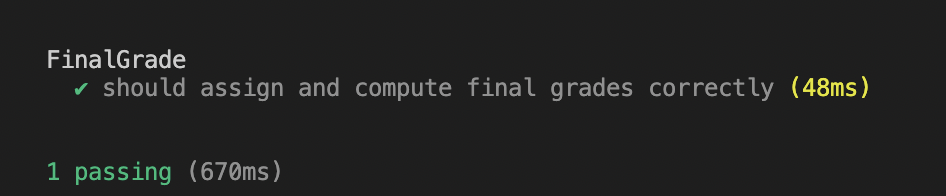